In [64]:
import numpy as np
import matplotlib.pyplot as plt

The principle to hold a bump in a network is what is called "Mexican hat" connectivity

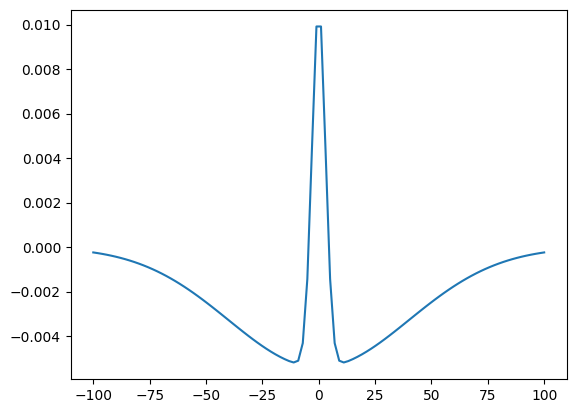

In [65]:
A1 = 0.6
A2 = 0.2
sigma1 = 3
sigma2 = 40
M = lambda k: (A1*np.exp(-k**2/(2*sigma1**2)) - A2*np.exp(-k**2/(2*sigma2**2)))/(sigma2-sigma1)

k = np.linspace(-100, 100, 100)
plt.plot(k, M(k))

Creating the weight matrix. The weight matrix will have short range excitation and long range inhibition

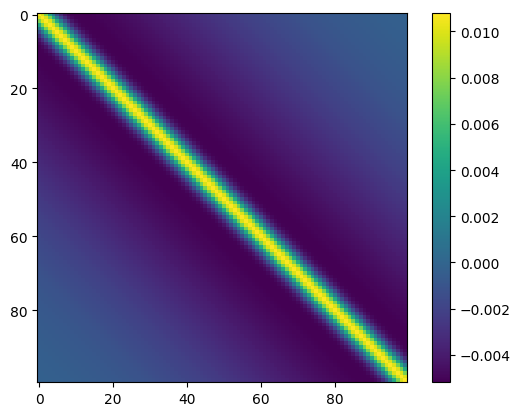

In [66]:
N = 100
W = np.zeros((N, N))

for i in range(N):
  for j in range(N):
    W[i, j] = M(i-j)


plt.imshow(W)
plt.colorbar()

Creating the neuronal model

Text(0, 0.5, 'Firing rate')

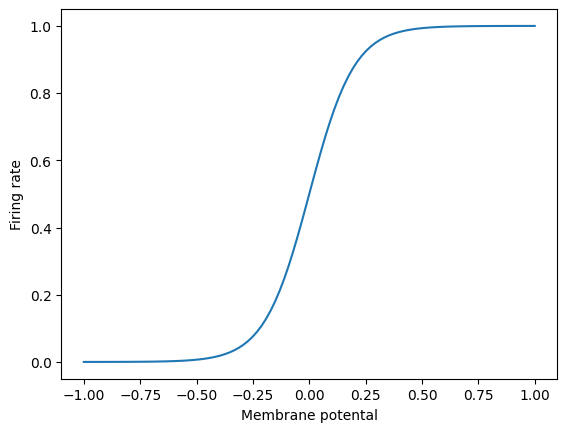

In [67]:
f = lambda u:1/(1 + np.exp(-10*u)) # This is the activation function

# if u is the membrane potential, f(u) is the firing rate

uu = np.linspace(-1, 1, 100)
plt.plot(uu, f(uu))
plt.xlabel('Membrane potental')
plt.ylabel('Firing rate')

If you put a bump in the network, it stays there:

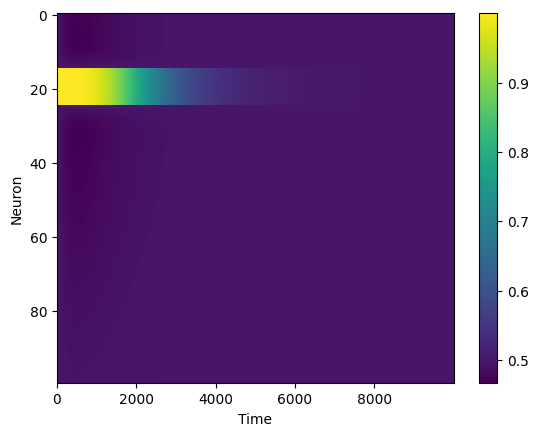

In [68]:

tau = 10.0
du = lambda u, I: -u/tau + W.dot(f(u - 0.7))/tau + I

h = 0.01
T = 10000
U = np.zeros((N, T)) # N neurons, T timepoints
I = np.zeros(N) # Input to the N neurons
idx = 20
U[idx-5: idx+5, 0] = 1 # Initial activity in neurons 10-30

for i in range(T-1):
  U[:,i + 1] = U[:,i] + h*du(U[:,i], I)


plt.imshow(f(U),  interpolation='nearest', aspect='auto') # Color is the firing rate of the neurons
plt.xlabel('Time')
plt.ylabel('Neuron')
plt.colorbar()

If you make the mexican hat asymmetric, you can move the bump around:

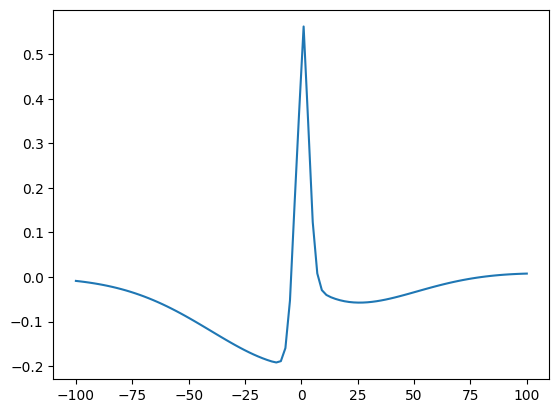

In [87]:
A1 = 0.6
A2 = 0.2
sigma1 = 3
sigma2 = 40
#M = lambda k: (((A1*np.exp(-(k*2)**2/(2*sigma1**2)) - A2*np.exp(-(k*2)**2/(2*sigma2**2)))/(sigma2-sigma1)) + ((np.heaviside((k), 0)*0.1*np.exp(-np.abs((k*2))/sigma2))/(sigma2-sigma1))) * 50
M = lambda k: A1*np.exp(-k**2/(2*sigma1**2)) - A2*np.exp(-k**2/(2*sigma2**2)) + np.heaviside(k, 0)*0.2*np.exp(-np.abs(k)/sigma2)

k = np.linspace(-100, 100, 100)
plt.plot(k, M(k))

Recreating the weight matrix

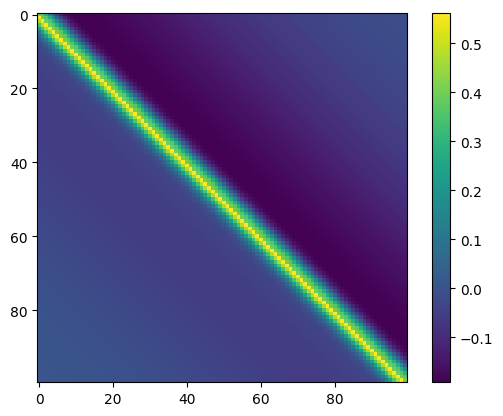

In [88]:
N = 100
W = np.zeros((N, N))

for i in range(N):
  for j in range(N):
    W[i, j] = M(i-j)


plt.imshow(W)
plt.colorbar()

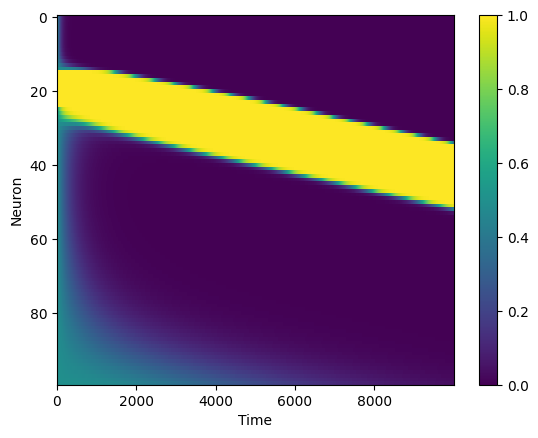

In [89]:
tau = 10.0
du = lambda u, I: -u/tau + W.dot(f(u - 0.7))/tau + I

h = 0.01
T = 10000
U = np.zeros((N, T)) # N neurons, T timepoints
I = np.zeros(N) # Input to the N neurons
idx = 20
U[idx-5: idx+5, 0] = 1 # Initial activity in neurons 10-30

for i in range(T-1):
  U[:,i + 1] = U[:,i] + h*du(U[:,i], I)


plt.imshow(f(U),  interpolation='nearest', aspect='auto') # The color is the firing rate
plt.xlabel('Time')
plt.ylabel('Neuron')
plt.colorbar()

# Part 2: Clopath Model with rate based coding

In [72]:
import nest
import numpy as np
import matplotlib.pyplot as plt

res = 0.1
nest.resolution = res

ModuleNotFoundError: No module named 'nest'

# How to encode the rate
Use a specific window frame (for one simulation run) to count the number of spikes detected in it. Use that and the time taken for the window as to calculate the rate.

In [ ]:
frame = 100
num_repeated = 25
poi_gen = nest.Create('poisson_generator') # spikes per second
nest.set_verbosity("M_ERROR")
poi_gen.rate = 100

def get_spike_count():
    nest.Simulate(frame)
    events = spikerecorder.get("events")
    senders = events["senders"]
    return int(len(senders))

spikerecorder = nest.Create("spike_recorder")
nest.Connect(poi_gen, spikerecorder)

def run_spikes():
    spike_total = 0
    for i in range(num_repeated):
        spikerecorder.n_events = 0
        num_spikes = get_spike_count()
        f = lambda spike: spike/((frame*res)/100)
        spike_total += f(num_spikes)
    spike_count = spike_total/num_repeated
    print(" Spike count average:" + str(spike_count))

run_spikes()

 Spike count average:100.8


In [ ]:
def pitch_fork_bifurcation():
    change_x = lambda x, r: (r*x) - x **3
    list_x = np.empty(100)
    list_x[0] = 1
    for i in range(len(list_x) - 1):
        list_x[i+1] = list_x[i] + change_x(list_x[i], 0)
    
    plt.plot(list_x)
    plt.show()

# pitch_fork_bifurcation()
x = (70 - 50)/30
print(np.tanh(x))

0.5827829453479101


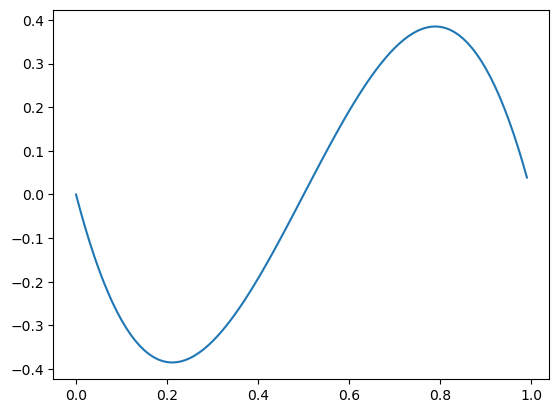

In [ ]:
def phase_plane_potrait():
    list_x = np.arange(0, 1, 0.01)         ## weight
    list_y = np.empty(len(list_x))          ## weight_change
    dy = lambda x, r: ((-r + 1)*x - x**3)
    for i in range(len(list_x)):
        x_value = (list_x[i] - 0.5) * 2
        r_value = 0
        list_y[i] = dy(x_value, r_value)
    plt.plot(list_x, list_y)
    plt.show()
    
phase_plane_potrait()
